In [1]:
#https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data

In [2]:
!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8540/862041/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1647432268&Signature=eJlPoQ5bk6zBJ%2F0mPwJKyvBqmPgzIJM1VCcUVzh1X%2BlmZ0Qw7Uw4TLBc%2BglVbVQSVVsgYucEj%2Bk6dozRH%2Fcj4S%2B54j5seIT6KslJEIR9TZpeQCPNZIV0LNxiU%2BfOZGOlTrOSdcK%2B2uzHVPNEhBMa%2FbE3wOQpTXkpyg0BEyT9f4y7mg9teD9n6SaztHN7xfVZzvnOTK%2BBBukzS%2Bo%2Fk5n3IyToltzSGaa6a7EevoDKsv9xt9Sm7dDtyz2NPYPqy28r0y25OOoe0%2BAOkZeGzwepZZj3WIvxZC%2B2F0TC2Rpb41ObzBvCk5olGGKjip%2FIEF18mBcVX5dpUsAfBx9BrYWq4g%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -O data.zip

--2022-03-13 14:07:17--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8540/862041/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1647432268&Signature=eJlPoQ5bk6zBJ%2F0mPwJKyvBqmPgzIJM1VCcUVzh1X%2BlmZ0Qw7Uw4TLBc%2BglVbVQSVVsgYucEj%2Bk6dozRH%2Fcj4S%2B54j5seIT6KslJEIR9TZpeQCPNZIV0LNxiU%2BfOZGOlTrOSdcK%2B2uzHVPNEhBMa%2FbE3wOQpTXkpyg0BEyT9f4y7mg9teD9n6SaztHN7xfVZzvnOTK%2BBBukzS%2Bo%2Fk5n3IyToltzSGaa6a7EevoDKsv9xt9Sm7dDtyz2NPYPqy28r0y25OOoe0%2BAOkZeGzwepZZj3WIvxZC%2B2F0TC2Rpb41ObzBvCk5olGGKjip%2FIEF18mBcVX5dpUsAfBx9BrYWq4g%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1336672127 (1.2G) [application/zip]
Saving to: ‘data.zip’

data.zip   

In [3]:
!unzip data.zip

Archive:  data.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               f
gj


In [4]:
#Imports

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [48]:
#user fn

In [5]:
def convert_to_category(columns: list, df: pd.DataFrame()) -> pd.DataFrame():
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [6]:
def set_datetime_to_column(columns: list, df: pd.DataFrame()) -> pd.DataFrame():
    for col in columns:
        df[col] = pd.to_datetime(df[col])
    return df

In [7]:
def get_nunique_value(columns: list, df: pd.DataFrame()) -> list:
    nunique = []
    for col in columns:
        nunique.append(modified_test_df[col].nunique())
    return nunique

In [8]:
def plot_rates_of_col(c: list, df:  pd.DataFrame(), join: str, var: str) -> pd.DataFrame():
    sub_df = df[c]
    sub_df = sub_df.groupby(join, as_index = False)
    sub_df = sub_df.mean()
    sub_df = sub_df.sort_values(var,  ascending=False)

    count_df = df[c]
    count_df = count_df.groupby(join , as_index = False)
    count_df = count_df.count()
    count_df = count_df.sort_values(var,  ascending=False)

    res_df = count_df.merge(sub_df, on = join, how = 'left')

    return res_df

In [9]:
def distribution_of_col(columns: list, nunique: list, df: pd.DataFrame()):
    for col, uniq in zip(columns, nunique):
        counts = df[col].value_counts()
        sorted_counts = np.sort(counts.values)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        line, = ax.plot(sorted_counts, color='red')
        ax.set_yscale('log')
        plt.title(f"Distribution of {col}")
        plt.ylabel('# Count')
        plt.xlabel('Index')
        plt.show()

In [10]:
def Histogram_of_col(columns: list, nunique: list, df: pd.DataFrame()):
    for col, uniq in zip(columns, nunique):
        counts = df[col].value_counts()
        sorted_counts = np.sort(counts.values)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.hist(sorted_counts, bins=50)
        ax.set_yscale('log', nonposy='clip')
        plt.title(f"Histogram of value counts for {col}")
        plt.ylabel('# ID')
        plt.xlabel('Occurences')
        plt.show()

In [11]:
#Global variables

N_ROWS = 1000000

In [12]:
train = pd.read_csv('train.csv', nrows = N_ROWS)

In [13]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [14]:
train.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
999995,29748,9,1,12,134,2017-11-06 16:21:51,NaN,0
999996,124520,12,1,15,178,2017-11-06 16:21:51,NaN,0
999997,206446,18,1,42,107,2017-11-06 16:21:51,NaN,0
999998,167577,12,1,13,265,2017-11-06 16:21:51,NaN,0
999999,121848,24,1,19,105,2017-11-06 16:21:51,NaN,0


In [15]:
train.describe()

,ip,app,device,os,channel,is_attributed
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,86993.581653,12.316655,26.141368,23.067662,241.523634,0.001693
std,55529.023541,16.216890,273.537010,55.323313,122.713405,0.041111
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42297.000000,3.000000,1.000000,13.000000,134.000000,0.000000
50%,81725.000000,12.000000,1.000000,18.000000,232.000000,0.000000
75%,120440.000000,15.000000,1.000000,19.000000,280.000000,0.000000
max,212773.000000,645.000000,3379.000000,715.000000,498.000000,1.000000


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ip               1000000 non-null  int64 
 1   app              1000000 non-null  int64 
 2   device           1000000 non-null  int64 
 3   os               1000000 non-null  int64 
 4   channel          1000000 non-null  int64 
 5   click_time       1000000 non-null  object
 6   attributed_time  1693 non-null     object
 7   is_attributed    1000000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 61.0+ MB


In [17]:
modified_test_df = convert_to_category(['ip', 'app', 'device', 'os', 'channel', 'is_attributed'], train)
modified_test_df = set_datetime_to_column(['click_time', 'attributed_time'], modified_test_df)

In [18]:
modified_test_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000,1693,1000000.0
unique,39611.0,214.0,298.0,160.0,154.0,1731,1530,2.0
top,73487.0,12.0,1.0,19.0,245.0,2017-11-06 16:05:10,2017-11-06 16:14:02,0.0
freq,6437.0,141851.0,938053.0,239642.0,92534.0,1261,4,998307.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 14:32:21,2017-11-06 16:00:47,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:21:51,2017-11-07 15:55:31,NaN


In [19]:
modified_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ip               1000000 non-null  category      
 1   app              1000000 non-null  category      
 2   device           1000000 non-null  category      
 3   os               1000000 non-null  category      
 4   channel          1000000 non-null  category      
 5   click_time       1000000 non-null  datetime64[ns]
 6   attributed_time  1693 non-null     datetime64[ns]
 7   is_attributed    1000000 non-null  category      
dtypes: category(6), datetime64[ns](2)
memory usage: 29.0 MB


In [20]:
import seaborn as sns

In [21]:
modified_test_df['ip'].nunique()

39611

In [22]:
columns = list(modified_test_df)
nunique = get_nunique_value(columns, modified_test_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


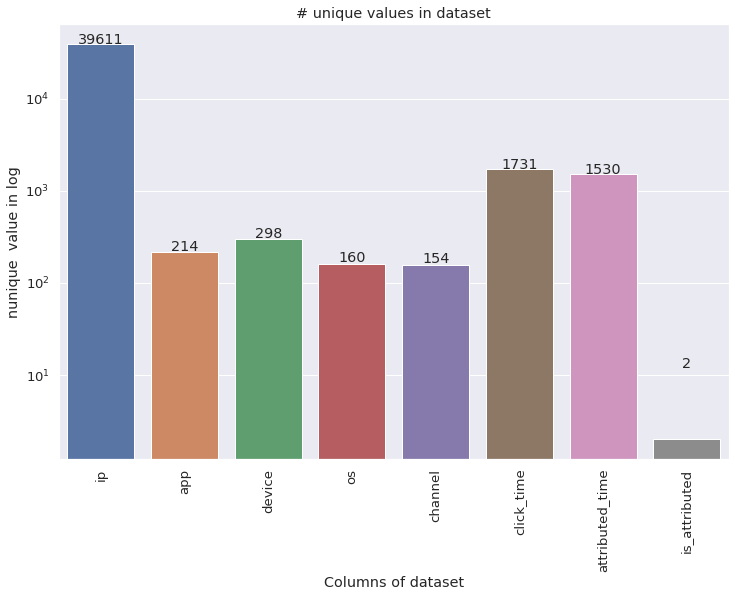

In [23]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
plt.xticks(rotation=90)
ax = sns.barplot(columns, nunique, log=True)
ax.set(xlabel='Columns of dataset', ylabel='nunique  value in log', title='# unique values in dataset')
for patche, count in zip(ax.patches, nunique):
    height = patche.get_height()
    ax.text(patche.get_x()+patche.get_width()/2., height + 10, count, ha="center") 

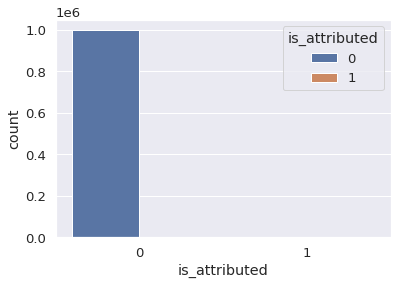

In [24]:
sns.countplot( x = 'is_attributed', hue="is_attributed", data = modified_test_df)

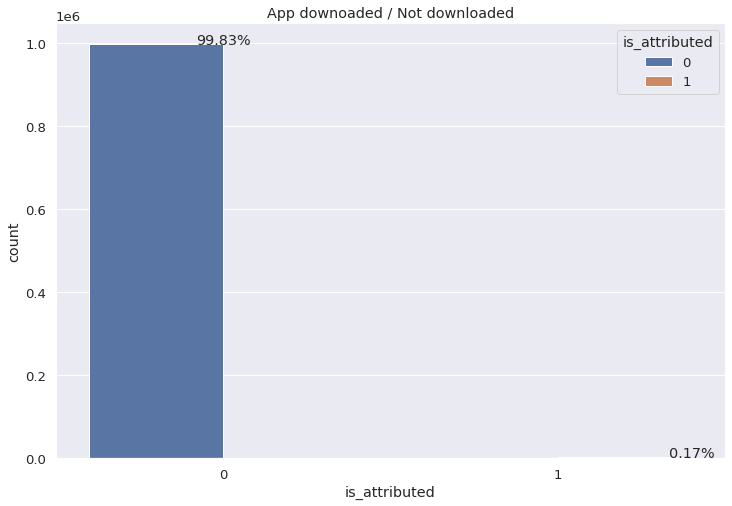

In [25]:
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
plt.figure(figsize=(12,8))
total = float(len(modified_test_df))
ax = sns.countplot(x="is_attributed", hue="is_attributed", data=modified_test_df)
plt.title('App downoaded / Not downloaded',)
for patche in ax.patches:
    percentage = '{:.2f}%'.format(100 * patche.get_height()/total)
    x = patche.get_x() + patche.get_width()
    y = patche.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of click by IP')

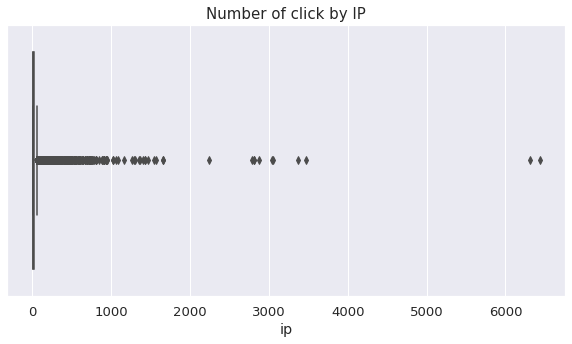

In [26]:
IP = modified_test_df['ip'].value_counts()
plt.figure(figsize = [10,5])
sns.boxplot(IP)
plt.title('Number of click by IP', fontsize =15)

In [27]:
IP.describe()

count    39611.000000
mean        25.245513
std         84.288111
min          1.000000
25%          3.000000
50%         10.000000
75%         25.000000
max       6437.000000
Name: ip, dtype: float64

In [28]:
IP = IP[IP > 300]

In [29]:
len(IP)

238

In [30]:
modified_test_df['is_attributed']=modified_test_df['is_attributed'].astype(int)

In [31]:
sub_df = modified_test_df[['ip', 'is_attributed']]
sub_df = sub_df.groupby('ip', as_index = False)
sub_df = sub_df.mean()
sub_df = sub_df.sort_values('is_attributed',  ascending=False)

In [32]:
count_df = modified_test_df[['ip', 'is_attributed']]
count_df = count_df.groupby('ip', as_index = False)
count_df = count_df.count()
count_df = count_df.sort_values('is_attributed',  ascending=False)

In [33]:
res_df = count_df.merge(sub_df, on='ip', how='left')

In [34]:
res_df.columns = ['ip', 'click_count', 'downloads']

In [35]:
columns = ['ip', 'is_attributed']
red_df = plot_rates_of_col(columns, modified_test_df, 'ip', 'is_attributed')
res_df.columns =  ['ip', 'is_attributed', 'Downloads']

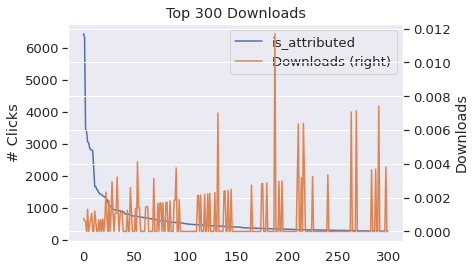

In [36]:
ax = res_df[:300].plot(secondary_y='Downloads')
plt.title('Top 300 Downloads')
ax.set(ylabel='# Clicks')
plt.ylabel('Downloads')
plt.show()

In [37]:
res_df[:10]

,ip,is_attributed,Downloads
0,73487,6437,0.000777
1,73516,6317,0.000633
2,105560,3474,0.000576
3,5314,3367,0.000000
4,5348,3057,0.001308
5,53454,3038,0.000000
6,105475,2872,0.000348
7,100275,2815,0.000710
8,201182,2807,0.001069
9,114276,2782,0.000000


In [38]:
modified_test_df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0


In [39]:
columns = ['app', 'is_attributed']
red_df = plot_rates_of_col(columns, modified_test_df, 'app', 'is_attributed')
res_df.columns =  ['app', 'is_attributed', 'Downloads']

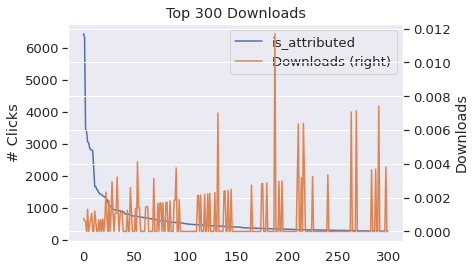

In [40]:
ax = res_df[:300].plot(secondary_y='Downloads')
plt.title('Top 300 Downloads')
ax.set(ylabel='# Clicks')
plt.ylabel('Downloads')
plt.show()

In [41]:
res_df[:10]

,app,is_attributed,Downloads
0,73487,6437,0.000777
1,73516,6317,0.000633
2,105560,3474,0.000576
3,5314,3367,0.000000
4,5348,3057,0.001308
5,53454,3038,0.000000
6,105475,2872,0.000348
7,100275,2815,0.000710
8,201182,2807,0.001069
9,114276,2782,0.000000


In [42]:
columns = ['os', 'is_attributed']
red_df = plot_rates_of_col(columns, modified_test_df, 'os', 'is_attributed')
res_df.columns =  ['os', 'is_attributed', 'Downloads']

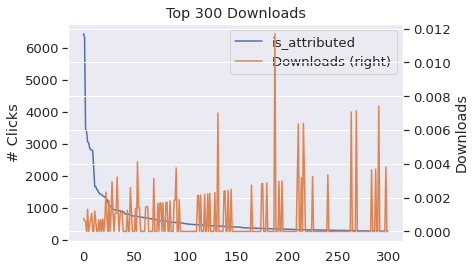

In [43]:
ax = res_df[:300].plot(secondary_y='Downloads')
plt.title('Top 300 Downloads')
ax.set(ylabel='# Clicks')
plt.ylabel('Downloads')
plt.show()

In [44]:
res_df[:10]

,os,is_attributed,Downloads
0,73487,6437,0.000777
1,73516,6317,0.000633
2,105560,3474,0.000576
3,5314,3367,0.000000
4,5348,3057,0.001308
5,53454,3038,0.000000
6,105475,2872,0.000348
7,100275,2815,0.000710
8,201182,2807,0.001069
9,114276,2782,0.000000


In [45]:
columns = list(modified_test_df)
nunique = get_nunique_value(columns, modified_test_df)

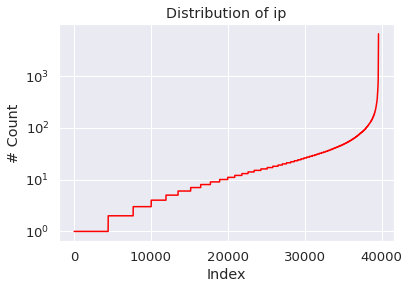

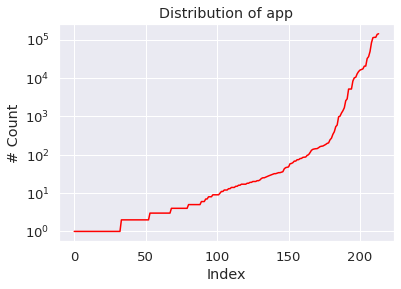

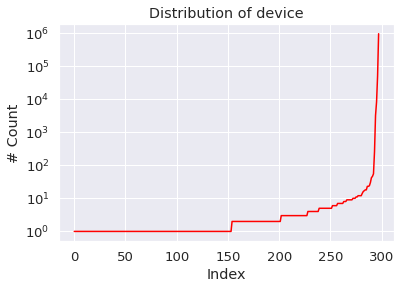

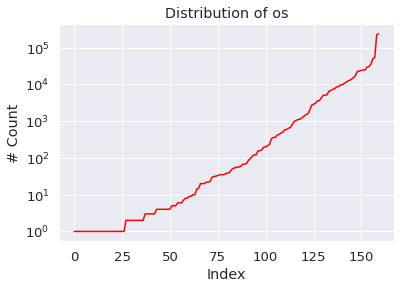

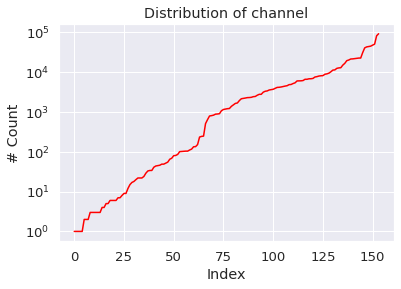

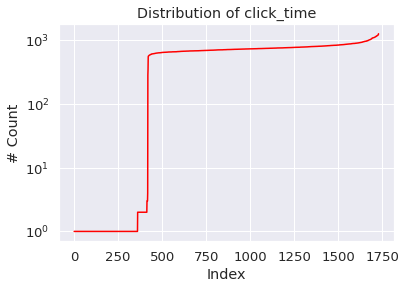

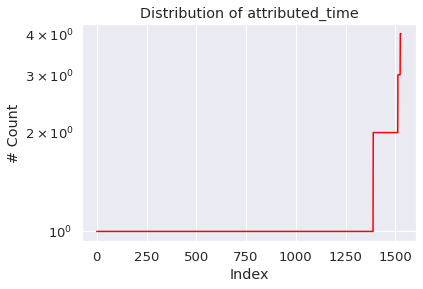

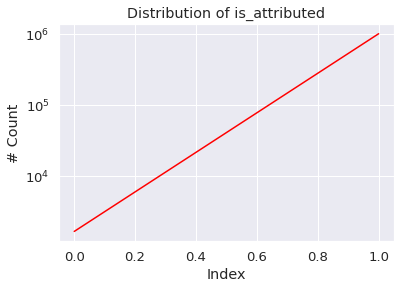

In [46]:
distribution_of_col(columns, nunique, modified_test_df)

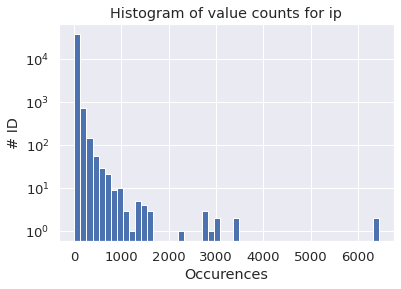

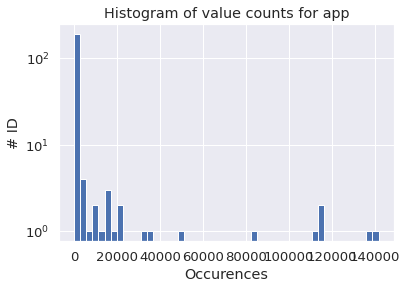

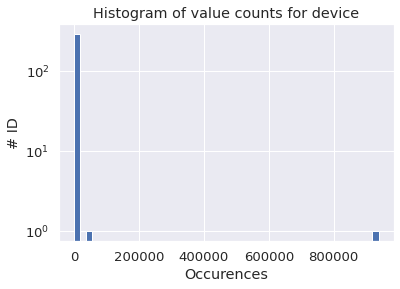

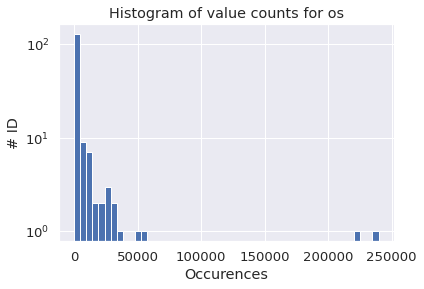

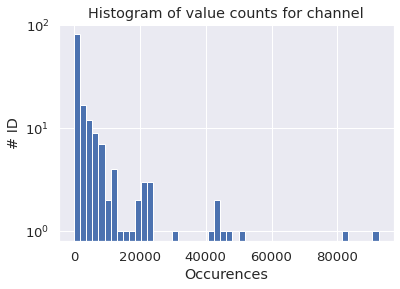

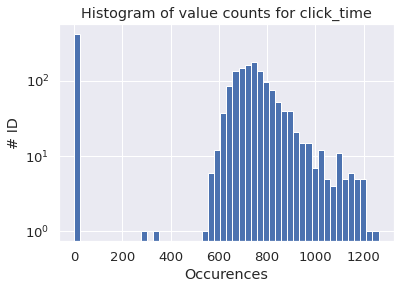

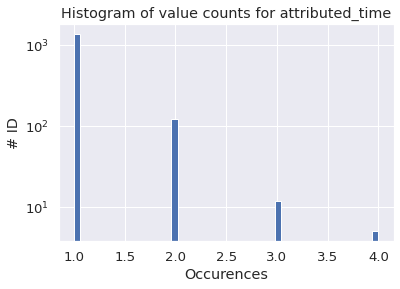

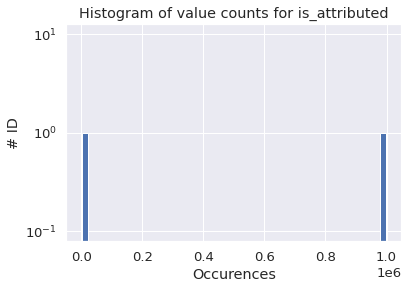

In [47]:
Histogram_of_col(columns, nunique, modified_test_df)